<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Peer-graded Assignment: Analyzing Historical Stock/Revenue Data and Building a Dashboard</h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
  <li><b>Question 1</b> - Extracting Tesla Stock Data Using yfinance - 2 Points</li>
  <li><b>Question 2</b> - Extracting Tesla Revenue Data Using Webscraping - 1 Point</li>
  <li><b>Question 3</b> - Extracting GameStop Stock Data Using yfinance - 2 Points</li>
  <li><b>Question 4</b> - Extracting GameStop Revenue Data Using Webscraping - 1 Point</li>
  <li><b>Question 5</b> - Tesla Stock and Revenue Dashboard - 2 Points</li>
  <li><b>Question 6</b> - GameStop Stock and Revenue Dashboard - 2 Points</li>
  <li><b>Question 7</b> - Sharing your Assignment Notebook - 2 Points</li>
</ul>
</div>

<hr>


## Setup

In [7]:
!pip install yfinance beautifulsoup4 pandas matplotlib

In [8]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

## Question 1: Extracting Tesla Stock Data Using yfinance

In [9]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Extracting Tesla Revenue Data Using Webscraping


In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

table = soup.find_all("tbody")[1]
tesla_revenue = []

rows = table.find_all("tr")
for row in rows:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        tesla_revenue.append([date, revenue])

tesla_revenue_df = pd.DataFrame(tesla_revenue, columns=["Date", "Revenue"])
tesla_revenue_df["Revenue"] = tesla_revenue_df["Revenue"].str.replace(',|\$', "", regex=True)
tesla_revenue_df.dropna(inplace=True)
tesla_revenue_df = tesla_revenue_df[tesla_revenue_df["Revenue"] != ""]
tesla_revenue_df["Revenue"] = pd.to_numeric(tesla_revenue_df["Revenue"])
tesla_revenue_df.head()


,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


## Question 3: Extracting GameStop Stock Data Using yfinance


In [25]:
import yfinance as yf

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

table = soup.find_all("tbody")[1]
gme_revenue = []

rows = table.find_all("tr")
for row in rows:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        gme_revenue.append([date, revenue])

gme_revenue_df = pd.DataFrame(gme_revenue, columns=["Date", "Revenue"])
gme_revenue_df["Revenue"] = gme_revenue_df["Revenue"].str.replace(',|\$', "", regex=True)
gme_revenue_df.dropna(inplace=True)
gme_revenue_df = gme_revenue_df[gme_revenue_df["Revenue"] != ""]
gme_revenue_df["Revenue"] = pd.to_numeric(gme_revenue_df["Revenue"])
gme_revenue_df.tail()


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph

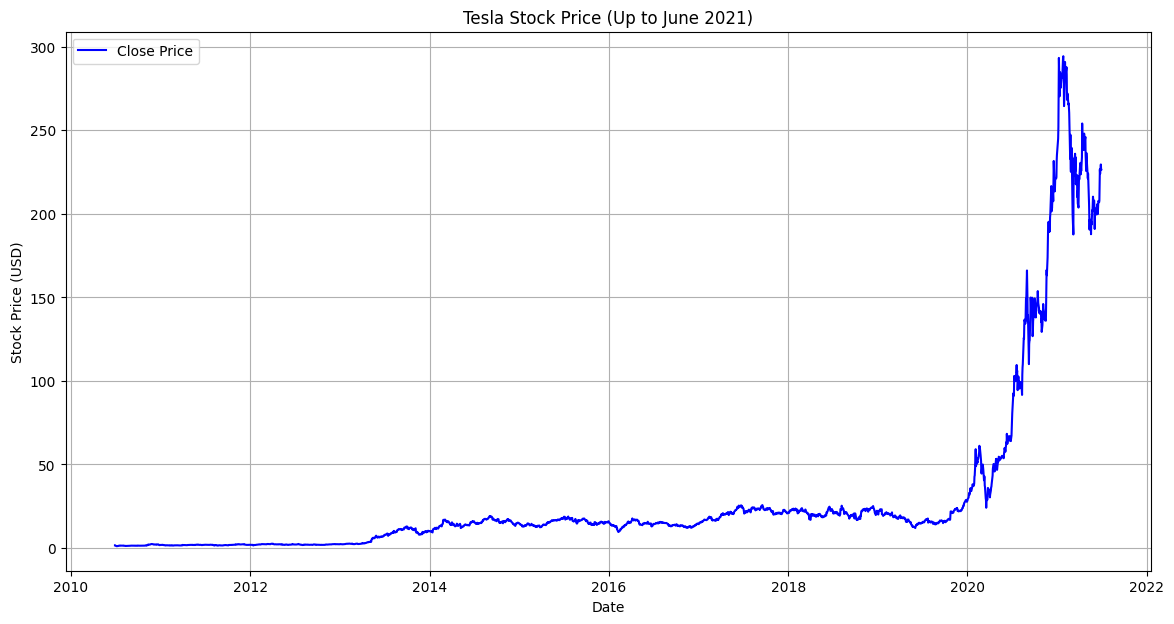

In [34]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    stock_data = stock_data[stock_data["Date"] <= "2021-06-30"]
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data["Date"], stock_data["Close"], label="Close Price", color="blue")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.legend()
    plt.grid()
    plt.show()

make_graph(tesla_data, "Tesla Stock Price (Up to June 2021)")


## Question 6: Plot GameStop Stock Graph


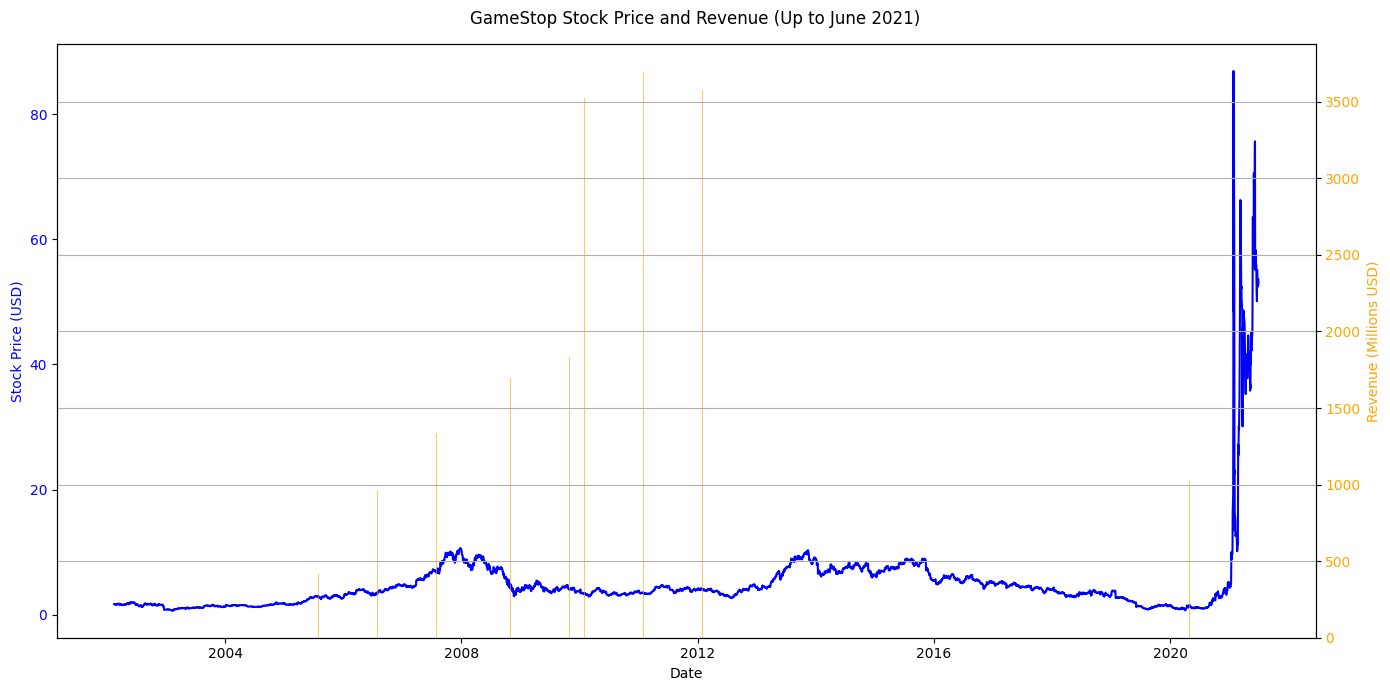

In [33]:
def make_graph(stock_data, revenue_data, title):
    stock_data["Date"] = pd.to_datetime(stock_data["Date"])
    revenue_data["Date"] = pd.to_datetime(revenue_data["Date"])
    stock_data = stock_data[stock_data["Date"] <= "2021-06-30"]
    revenue_data = revenue_data[revenue_data["Date"] <= "2021-06-30"]

    fig, ax1 = plt.subplots(figsize=(14, 7))
    ax1.plot(stock_data["Date"], stock_data["Close"], label="Stock Price", color="blue")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price (USD)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    ax2 = ax1.twinx()
    ax2.bar(revenue_data["Date"], revenue_data["Revenue"], alpha=0.6, color="orange", label="Revenue")
    ax2.set_ylabel("Revenue (Millions USD)", color="orange")
    ax2.tick_params(axis="y", labelcolor="orange")

    fig.suptitle(title)
    fig.tight_layout()
    plt.grid()
    plt.show()

make_graph(gme_data, gme_revenue_df, "GameStop Stock Price and Revenue (Up to June 2021)")
